<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/compressor_curves_and_compressor_calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
%%capture
!pip install git+https://github.com/equinor/neqsim-python.git

# NeqSim and compressor calculations
1. https://github.com/equinor/neqsim/wiki/Compressor-Calc
2. https://github.com/equinor/neqsim/wiki/Compressor-curves

# Compressor Curves
Define the compressor curves:

In [67]:
# Define chart data
chartConditions = [] #used to set molecular weight etc.

speed = [7000, 7500, 8000, 8500, 9000, 9500, 9659, 10000, 10500]
flow = [
    [4512.7, 5120.8, 5760.9, 6401, 6868.27],
    [4862.47, 5486.57, 6172.39, 6858.21, 7550.89],
    [5237.84, 5852.34, 6583.88, 7315.43, 8046.97, 8266.43],
    [5642.94, 6218.11, 6995.38, 7772.64, 8549.9, 9000.72],
    [6221.77, 6583.88, 7406.87, 8229.85, 9052.84, 9768.84],
    [6888.85, 6949.65, 7818.36, 8687.07, 9555.77, 10424.5, 10546.1],
    [7109.83, 7948.87, 8832.08, 9715.29, 10598.5, 10801.6],
    [7598.9, 8229.85, 9144.28, 10058.7, 10973.1, 11338.9],
    [8334.1, 8641.35, 9601.5, 10561.6, 11521.8, 11963.5],
]
head = [
    [61.885, 59.639, 56.433, 52.481, 49.132],
    [71.416, 69.079, 65.589, 61.216, 55.858],
    [81.621, 79.311, 75.545, 70.727, 64.867, 62.879],
    [92.493, 90.312, 86.3, 81.079, 74.658, 70.216],
    [103.512, 102.073, 97.83, 92.254, 85.292, 77.638],
    [114.891, 114.632, 110.169, 104.221, 96.727, 87.002, 85.262],
    [118.595, 114.252, 108.203, 100.55, 90.532, 87.54],
    [126.747, 123.376, 117.113, 109.056, 98.369, 92.632],
    [139.082, 137.398, 130.867, 122.264, 110.548, 103.247],
]
polyEff = [
    [78.3, 78.2, 77.2, 75.4, 73.4],
    [78.3, 78.3, 77.5, 75.8, 73],
    [78.2, 78.4, 77.7, 76.1, 73.5, 72.5],
    [78.2, 78.4, 77.9, 76.4, 74, 71.9],
    [78.3, 78.4, 78, 76.7, 74.5, 71.2],
    [78.3, 78.4, 78.1, 77, 74.9, 71.3, 70.5],
    [78.4, 78.1, 77.1, 75, 71.4, 70.2],
    [78.3, 78.2, 77.2, 75.2, 71.7, 69.5],
    [78.2, 78.2, 77.3, 75.5, 72.2, 69.6],
]

headunit = 'kJ/kg'

In [68]:
surgeflow = [4512.7, 4862.47, 5237.84, 5642.94, 6221.77, 6888.85, 7109.83, 7598.9, 8334.1]
surgehead = [61.885, 71.416, 81.621, 92.493, 103.512, 114.891, 118.595, 126.747, 139.082]

# Establish the process model

In [80]:
import neqsim
import neqsim.thermo
from neqsim.thermo import fluid
from neqsim.process import compressor, stream, clearProcess

clearProcess()

# Define the fluid
testFluid = fluid('pr', 273.15 + 29.96, 75.73)
testFluid.addComponent('nitrogen', 0.7823)
testFluid.addComponent('CO2', 1.245)
testFluid.addComponent('methane', 88.4681)
testFluid.addComponent('ethane', 4.7652)
testFluid.addComponent('propane', 2.3669)
testFluid.addComponent('i-butane', 0.3848)
testFluid.addComponent('n-butane', 0.873)
testFluid.addComponent('i-pentane', 0.243)
testFluid.addComponent('n-pentane', 0.2947)
testFluid.addComponent('n-hexane', 0.2455)
testFluid.addComponent('n-heptane', 0.1735)
testFluid.addComponent('n-octane', 0.064)
testFluid.addComponent('water', 0.076)
testFluid.setMixingRule('classic')

# Create and run the stream and set temperature, pressure and flow rate
stream_1 = stream('Stream1', testFluid)
stream_1.setTemperature(29.96, 'C')
stream_1.setPressure(75.73, 'bara')
stream_1.setFlowRate(559401.418270102, 'kg/hr')
stream_1.run()

# Define the compressor
comp1 = compressor('compressor 1', stream_1)
comp1.setCompressorChartType('interpolate and extrapolate')
comp1.setUsePolytropicCalc(True)
comp1.setSpeed(8765)
comp1.setUseGERG2008(False)

comp1.getCompressorChart().setCurves(chartConditions, speed, flow, head, polyEff)
comp1.getCompressorChart().setHeadUnit(headunit)

comp1.getCompressorChart().getSurgeCurve().setCurve(chartConditions, surgeflow, surgehead)

comp1.getAntiSurge().setSurgeControlFactor(1.0)
comp1.run()

# 1. The interpolate and extrapolate compressor curve method

See [documentation](https://github.com/equinor/neqsim/wiki/Compressor-curves#compressor-calculations-using-interpolation-and-extrapolation-method)



## Description of "interpolate and extrapolate" method
This class predicts compressor performance using map lookup and extrapolation. It involves:

Map Lookup: Finding closest data points to the operating conditions.
Interpolation (if needed): Estimating performance between data points.
Extrapolation (if needed): Predicting performance outside the map's range.

Interpolation:

Bilinear Interpolation: Used for interpolating across two dimensions (e.g., flow and speed).

$f(x, y) \approx f(x_1, y_1)(1 - \alpha)(1 - \beta) + f(x_2, y_1)\alpha(1 - \beta) + f(x_1, y_2)(1 - \alpha)\beta + f(x_2, y_2)\alpha\beta$
Use code with caution
where: - $f(x, y)$ is the interpolated value at coordinates $(x, y)$. - $f(x_1, y_1)$, $f(x_2, y_1)$, $f(x_1, y_2)$, $f(x_2, y_2)$ are values at surrounding data points. - $\alpha = \frac{x - x_1}{x_2 - x_1}$ and $\beta = \frac{y - y_1}{y_2 - y_1}$ are interpolation factors.

Extrapolation:

Extrapolation along Speed Lines: Assumes head and efficiency vary along lines of constant speed.

$H = aN^2 + bNQ + cQ^2$

$\eta = dN + eQ + f$

where:
   - $H$ is the head, $Q$ is the flow rate, $N$ is the speed, and $\eta$ is the efficiency.
   - $a$, $b$, $c$, $d$, $e$, $f$ are coefficients determined from map data.
Other Extrapolation Methods: NeqSim might employ other techniques, like polynomial or exponential functions.

Key Methods and Math

calcHead(): Estimates compressor head using map lookup and interpolation/extrapolation based on the equations above.
calcEfficiency(): Estimates compressor efficiency using a similar approach to calcHead(), possibly using the efficiency equation above.
calcSurge(): Calculates surge conditions, likely by finding the intersection of operating conditions with the surge curve in the map.




In [81]:
comp1.setCompressorChartType('interpolate and extrapolate')
comp1.getCompressorChart().setCurves(chartConditions, speed, flow, head, polyEff)
comp1.getCompressorChart().getSurgeCurve().setCurve(chartConditions, surgeflow, surgehead)
comp1.getCompressorChart().setHeadUnit('kJ/kg')
comp1.run()

# Logging results
print(f"Speed: {comp1.getSpeed()}")
print(f"Outlet Pressure: {comp1.getOutletPressure()}")
print(f"Outlet Temperature (°C): {comp1.getOutTemperature() - 273.15}")
print(f"Inlet Flow Rate (m3/hr): {comp1.getInletStream().getFlowRate('m3/hr')}")
print(f"Polytropic Head: {comp1.getPolytropicFluidHead()}")
print(f"Polytropic Efficiency: {comp1.getPolytropicEfficiency()}")
print(f"Distance to Surge: {comp1.getDistanceToSurge()}")
print(f"Surge Flow Rate Margin: {comp1.getSurgeFlowRateMargin()}")
print(f"Surge Flow Rate: {comp1.getSurgeFlowRate()}")
print(f"Power (MW): {comp1.getPower('MW')}")
print(f"Is in Surge: {comp1.isSurge()}")

Speed: 8765.0
Outlet Pressure: 158.7732888810945
Outlet Temperature (°C): 93.8019936363861
Inlet Flow Rate (m3/hr): 8111.242453468489
Polytropic Head: 86.23770148382565
Polytropic Efficiency: 0.7626474550172627
Distance to Surge: 0.494632828439036
Surge Flow Rate Margin: 2684.3293687748355
Surge Flow Rate: 5426.913084693653
Power (MW): 17.570916286795605
Is in Surge: False


# 2. The interpolate method (extrapolation not possible)

Se [documentation](https://github.com/equinor/neqsim/wiki/Compressor-curves#compressor-calculations-using-interpolation-and-extrapolation-method)


## Method description for interpolate method

The CompressorChartAlternativeMapLookup class in NeqSim provides a way to predict compressor performance based on data from a performance map (chart). It primarily uses interpolation within the map's boundaries.

Here's a description and output for Colab:

Method Description: CompressorChartAlternativeMapLookup
This class focuses on estimating compressor performance by:

Map Lookup: Finding the closest data points in the compressor map to the given operating conditions (e.g., flow rate, speed).

Interpolation: If an exact match is not found, it interpolates between nearby data points to approximate the desired performance characteristics.

Important: This method generally does not perform extrapolation outside the map's data range.

Mathematical Concepts:
Interpolation:
Bilinear Interpolation: Often used for 2D interpolation across flow rate and speed.
Equation:

f(x, y) ≈ f(x₁, y₁)(1 - α)(1 - β) + f(x₂, y₁)(α)(1 - β) + f(x₁, y₂)(1 - α)(β) + f(x₂, y₂)(α)(β)
Use code with caution
 where:
   -  `f(x, y)` is the interpolated value.
   -  `f(x₁, y₁)`, `f(x₂, y₁)`, `f(x₁, y₂)`, `f(x₂, y₂)` are values at surrounding data points.
   -  `α = (x - x₁) / (x₂ - x₁)` and `β = (y - y₁) / (y₂ - y₁)` are interpolation factors.
Key Methods:
calcHead(): Estimates compressor head.
calcEfficiency(): Estimates compressor efficiency.
calcSurge(): Estimates surge conditions (within map limits).points within the map's surge region to estimate surge conditions, but it would not typically perform extrapolation to predict surge outside the map's boundaries.

In [71]:
comp1.setCompressorChartType('interpolate')
comp1.getCompressorChart().setCurves(chartConditions, speed, flow, head, polyEff)
comp1.getCompressorChart().getSurgeCurve().setCurve(chartConditions, surgeflow, surgehead)
comp1.getCompressorChart().setHeadUnit('kJ/kg')
comp1.run()

# Logging results
print(f"Speed: {comp1.getSpeed()}")
print(f"Outlet Pressure: {comp1.getOutletPressure()}")
print(f"Outlet Temperature (°C): {comp1.getOutTemperature() - 273.15}")
print(f"Inlet Flow Rate (m3/hr): {comp1.getInletStream().getFlowRate('m3/hr')}")
print(f"Polytropic Head: {comp1.getPolytropicFluidHead()}")
print(f"Polytropic Efficiency: {comp1.getPolytropicEfficiency()}")
print(f"Distance to Surge: {comp1.getDistanceToSurge()}")
print(f"Surge Flow Rate Margin: {comp1.getSurgeFlowRateMargin()}")
print(f"Surge Flow Rate: {comp1.getSurgeFlowRate()}")
print(f"Power (MW): {comp1.getPower('MW')}")
print(f"Is in Surge: {comp1.isSurge()}")

Speed: 8765.0
Outlet Pressure: 158.2135387717481
Outlet Temperature (°C): 93.52026031985628
Inlet Flow Rate (m3/hr): 8111.242453468489
Polytropic Head: 85.79774720204375
Polytropic Efficiency: 0.7622231339229714
Distance to Surge: 0.49988215765215305
Surge Flow Rate Margin: 2703.3226298435065
Surge Flow Rate: 5407.919823624982
Power (MW): 17.4910073110681
Is in Surge: False


# 3. The fan law method

Se [documentation](https://github.com/equinor/neqsim/wiki/Compressor-curves#compressor-calculations-using-fan-law)

## Core Functionality of fan law method

Fan Laws

The fan laws describe the relationships between the following variables in a centrifugal compressor:

Flow rate (Q): The volume of gas compressed per unit time.
Head (H): The energy imparted to the gas by the compressor.
Speed (N): The rotational speed of the compressor shaft.
Power (P): The power consumed by the compressor.
The fan laws are as follows:

Flow Law: Flow rate is proportional to speed. $$ \frac{Q_1}{Q_2} = \frac{N_1}{N_2} $$
Head Law: Head is proportional to the square of the speed. $$ \frac{H_1}{H_2} = \left(\frac{N_1}{N_2}\right)^2 $$
Power Law: Power is proportional to the cube of the speed. $$ \frac{P_1}{P_2} = \left(\frac{N_1}{N_2}\right)^3 $$
Application in CompressorChart.java

The CompressorChart.java file uses the fan laws to generate compressor performance curves for different operating conditions. The calcHead, calcFlow, and calcPolytropicEfficiency methods in the code use the fan laws to calculate the head, flow rate, and polytropic efficiency at a given speed based on the values at a reference speed. This allows the code to predict the compressor's performance at various operating points within the operating range of the compressor.


**Fan Laws**

1.  **Flow Law:**
    $ \frac{Q_1}{Q_2} = \frac{N_1}{N_2} $
2.  **Head Law:**
    $ \frac{H_1}{H_2} = \left(\frac{N_1}{N_2}\right)^2 $
3.  **Power Law:**
    $ \frac{P_1}{P_2} = \left(\frac{N_1}{N_2}\right)^3 $


In [72]:
comp1.setCompressorChartType('fan law')
comp1.getCompressorChart().setCurves(chartConditions, speed, flow, head, polyEff)
comp1.getCompressorChart().getSurgeCurve().setCurve(chartConditions, surgeflow, surgehead)
comp1.getCompressorChart().setHeadUnit('kJ/kg')
comp1.run()

# Logging results
print(f"Speed: {comp1.getSpeed()}")
print(f"Outlet Pressure: {comp1.getOutletPressure()}")
print(f"Outlet Temperature (°C): {comp1.getOutTemperature() - 273.15}")
print(f"Inlet Flow Rate (m3/hr): {comp1.getInletStream().getFlowRate('m3/hr')}")
print(f"Polytropic Head: {comp1.getPolytropicFluidHead()}")
print(f"Polytropic Efficiency: {comp1.getPolytropicEfficiency()}")
print(f"Distance to Surge: {comp1.getDistanceToSurge()}")
print(f"Surge Flow Rate Margin: {comp1.getSurgeFlowRateMargin()}")
print(f"Surge Flow Rate: {comp1.getSurgeFlowRate()}")
print(f"Power (MW): {comp1.getPower('MW')}")
print(f"Is in Surge: {comp1.isSurge()}")

Speed: 8765.0
Outlet Pressure: 158.97969860054363
Outlet Temperature (°C): 93.92402211119077
Inlet Flow Rate (m3/hr): 8111.242453468489
Polytropic Head: 86.40263949372887
Polytropic Efficiency: 0.7624651160455247
Distance to Surge: 0.49266785364104027
Surge Flow Rate Margin: 2677.1852828240835
Surge Flow Rate: 5434.057170644405
Power (MW): 17.608732393100645
Is in Surge: False


# Automatic generation of compressor curves using NeqSim
Se [documentation](https://github.com/equinor/neqsim/wiki/Compressor-curves#generation-of-compressor-curves)

This class utilizes a simplified approach based on the concept of polytropic efficiency and the fan laws to generate performance curves for centrifugal compressors.

Core Functionality

Reference Point: A reference point is established, often at the compressor's design conditions or a known operating point. This point defines the head, flow rate, speed, and polytropic efficiency used as a basis for curve generation.

Flow and Head Calculation: The fan laws are employed to calculate head and flow at different speeds relative to the reference point:

Flow Law:

Q2 = Q1 * (N2 / N1)
Use code with caution
    Where:
    *   Q1, Q2: Flow rates at speeds N1 and N2, respectively.
    *   N1, N2: Compressor speeds.

*   **Head Law:**

H2 = H1 * (N2 / N1)^2
Use code with caution
    Where:
    *   H1, H2: Heads at speeds N1 and N2, respectively.
Polytropic Efficiency: The polytropic efficiency is assumed to remain relatively constant across the operating range or to vary according to a simplified relationship with flow rate or speed.

NeqSim's implementation may use a fixed value or apply a small correction factor based on the flow rate deviation from the reference point.
Surge Curve Estimation: Surge conditions are estimated based on empirical relationships or simplified models derived from compressor characteristics. These relationships might involve flow rate, head, and speed, and are used to generate a surge curve, which defines the compressor's operational limit.

Equations for Colab Text Cell

You can directly paste the following equations into a Colab text cell:


**Fan Laws**

1.  Flow Law:
    Q₂ = Q₁ * (N₂ / N₁)

2.  Head Law:
    H₂ = H₁ * (N₂ / N₁)²

3.  Polytropic Head:
    H_p = (Z * R * T₁ / MW) * (k / (k - 1)) * [(P₂ / P₁)^((k - 1) / k) - 1]

Where:

*   Q: Flow rate
*   N: Speed
*   H: Head
*   H_p: Polytropic Head
*   Z: Compressibility factor
*   R: Ideal gas constant
*   T₁: Inlet temperature
*   MW: Molecular weight
*   k: Polytropic exponent
*   P₁, P₂: Inlet and outlet pressures, respectively.


In [73]:
from neqsim import jneqsim
compchartgenerator1 = jneqsim.process.equipment.compressor.CompressorChartGenerator(comp1)
compressor_chart1 = compchartgenerator1.generateCompressorChart("normal curves")
comp1.setCompressorChart(compressor_chart1)

In [74]:
comp1.run()
# Logging results
print(f"Speed: {comp1.getSpeed()}")
print(f"Outlet Pressure: {comp1.getOutletPressure()}")
print(f"Outlet Temperature (°C): {comp1.getOutTemperature() - 273.15}")
print(f"Inlet Flow Rate (m3/hr): {comp1.getInletStream().getFlowRate('m3/hr')}")
print(f"Polytropic Head: {comp1.getPolytropicFluidHead()}")
print(f"Polytropic Efficiency: {comp1.getPolytropicEfficiency()}")
print(f"Distance to Surge: {comp1.getDistanceToSurge()}")
print(f"Surge Flow Rate Margin: {comp1.getSurgeFlowRateMargin()}")
print(f"Surge Flow Rate: {comp1.getSurgeFlowRate()}")
print(f"Power (MW): {comp1.getPower('MW')}")
print(f"Is in Surge: {comp1.isSurge()}")

Speed: 8765.0
Outlet Pressure: 158.9796985963348
Outlet Temperature (°C): 93.9240221089064
Inlet Flow Rate (m3/hr): 8111.242453468489
Polytropic Head: 86.40263949040019
Polytropic Efficiency: 0.7624651160455247
Distance to Surge: 1.7749012206186667
Surge Flow Rate Margin: 5188.168149706396
Surge Flow Rate: 2923.0743037620923
Power (MW): 17.60873239242226
Is in Surge: False


# Run at different flow rates and compressor speed
In the following script you can test the model at different flow rates

In [75]:
flow_factor = 0.9
stream_1.setFlowRate(559401.418270102*flow_factor, 'kg/hr')
stream_1.run()
comp1.setSpeed(9500)
comp1.setSolveSpeed(False)
comp1.run()
# Logging results
print(f"Speed: {comp1.getSpeed()}")
print(f"Outlet Pressure: {comp1.getOutletPressure()}")
print(f"Outlet Temperature (°C): {comp1.getOutTemperature() - 273.15}")
print(f"Inlet Flow Rate (m3/hr): {comp1.getInletStream().getFlowRate('m3/hr')}")
print(f"Polytropic Head: {comp1.getPolytropicFluidHead()}")
print(f"Polytropic Efficiency: {comp1.getPolytropicEfficiency()}")
print(f"Distance to Surge: {comp1.getDistanceToSurge()}")
print(f"Surge Flow Rate Margin: {comp1.getSurgeFlowRateMargin()}")
print(f"Surge Flow Rate: {comp1.getSurgeFlowRate()}")
print(f"Power (MW): {comp1.getPower('MW')}")
print(f"Is in Surge: {comp1.isSurge()}")

Speed: 9500.0
Outlet Pressure: 198.95157042688302
Outlet Temperature (°C): 117.29229610039386
Inlet Flow Rate (m3/hr): 7300.118208121634
Polytropic Head: 116.14635609698549
Polytropic Efficiency: 0.710501889143179
Distance to Surge: -0.36308201826254427
Surge Flow Rate Margin: -4161.511730803248
Surge Flow Rate: 11461.629938924882
Power (MW): 22.861457977933984
Is in Surge: True


# Find speed at given outlet pressure
In the folloing exmaple we specify the outlet pressure and use the compressor curves to solve for the speed and outlet temperature.

In [76]:
flow_factor = 1.0
stream_1.setFlowRate(559401.418270102*flow_factor, 'kg/hr')
stream_1.run()
comp1.setSolveSpeed(True)
comp1.setOutletPressure(190.0, 'bara')
comp1.run()
# Logging results
print(f"Speed: {comp1.getSpeed()}")
print(f"Outlet Pressure: {comp1.getOutletPressure()}")
print(f"Outlet Temperature (°C): {comp1.getOutTemperature() - 273.15}")
print(f"Inlet Flow Rate (m3/hr): {comp1.getInletStream().getFlowRate('m3/hr')}")
print(f"Polytropic Head: {comp1.getPolytropicHead()}")
print(f"Polytropic Efficiency: {comp1.getPolytropicEfficiency()}")
print(f"Distance to Surge: {comp1.getDistanceToSurge()}")
print(f"Surge Flow Rate Margin: {comp1.getSurgeFlowRateMargin()}")
print(f"Surge Flow Rate: {comp1.getSurgeFlowRate()}")
print(f"Power (MW): {comp1.getPower('MW')}")
print(f"Is in Surge: {comp1.isSurge()}")

Speed: 9550.260186649328
Outlet Pressure: 190.0
Outlet Temperature (°C): 110.54064062884822
Inlet Flow Rate (m3/hr): 8111.242453468489
Polytropic Head: 109.55773378400455
Polytropic Efficiency: 0.7401076698281321
Distance to Surge: -0.0025065863569245783
Surge Flow Rate Margin: -20.382620469959875
Surge Flow Rate: 8131.625073938449
Power (MW): 22.861457978712735
Is in Surge: True


# Plotting compressor curves and operational point
The folloing code is run with the "The interpolate and extrapolate compressor curve method" for best accuracy.


In [77]:
import matplotlib.pyplot as plt
import numpy as np

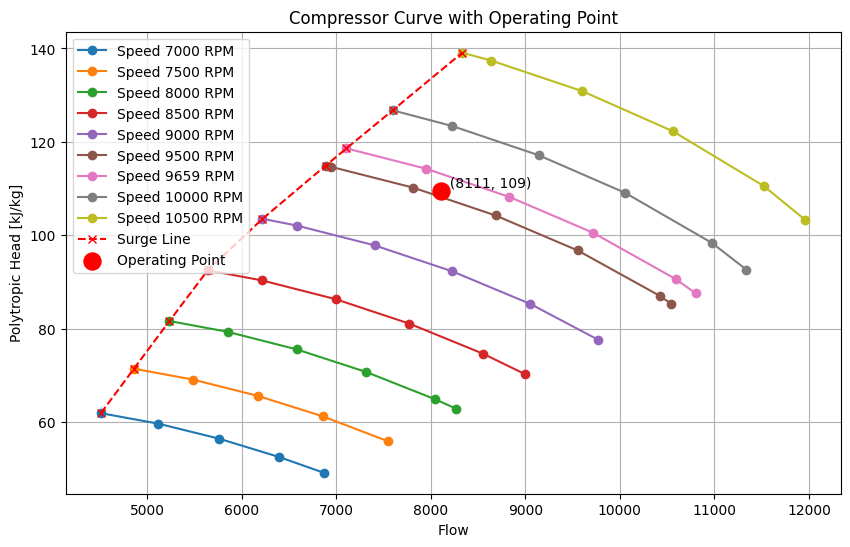

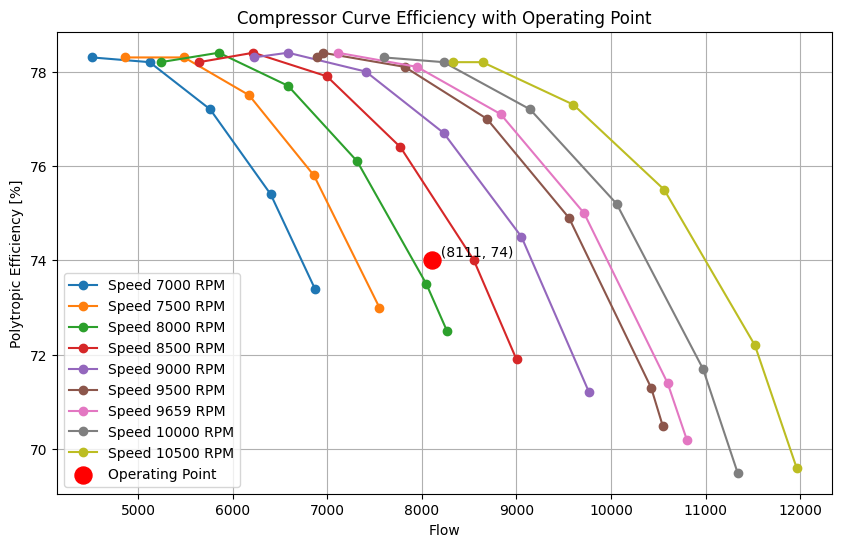

In [78]:
# Plot the operating point
operating_flow = comp1.getInletStream().getFlowRate('m3/hr')
operating_head = comp1.getPolytropicHead()
operating_eff = comp1.getPolytropicEfficiency()*100

# Plot 1: Flow vs Head
plt.figure(figsize=(10, 6))
for i, speeds in enumerate(speed):
    plt.plot(flow[i], head[i], label=f"Speed {speeds} RPM", marker="o")
plt.plot(surgeflow, surgehead, label="Surge Line", linestyle="--", color="r", marker="x")
plt.scatter(operating_flow, operating_head, color="red", label="Operating Point", s=150, zorder=5)
plt.text(
    operating_flow,
    operating_head,
    f"  ({int(operating_flow)}, {int(operating_head)})",
    verticalalignment="bottom",
    horizontalalignment="left",
)
plt.title("Compressor Curve with Operating Point")
plt.xlabel("Flow")
plt.ylabel(f"Polytropic Head [{headunit}]")
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Flow vs Polytropic Efficiency
plt.figure(figsize=(10, 6))
for i, speeds in enumerate(speed):
    plt.plot(flow[i], polyEff[i], label=f"Speed {speeds} RPM", marker="o")
plt.scatter(operating_flow, operating_eff, color="red", label="Operating Point", s=150, zorder=5)
plt.text(
    operating_flow,
    operating_eff,
    f"  ({int(operating_flow)}, {int(operating_eff)})",
    verticalalignment="bottom",
    horizontalalignment="left",
)
plt.title("Compressor Curve Efficiency with Operating Point")
plt.xlabel("Flow")
plt.ylabel("Polytropic Efficiency [%]")
plt.legend()
plt.grid(True)
plt.show()

# Compressor curve test with varying flow and outlet pressure

In [82]:
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

# ... (Your existing code for defining compressor curves and the compressor object 'comp1') ...

# Create a slider for flow rate
flow_rate_slider = widgets.FloatSlider(
    value=stream_1.getFlowRate('kg/hr'),
    min=min([min(f) for f in flow]) * stream_1.getFlowRate('kg/hr') / min(surgeflow)/2, # Minimum flow based on the lowest value in flow curves
    max=max([max(f) for f in flow]) * stream_1.getFlowRate('kg/hr') / max(surgeflow),  # Maximum flow based on the highest value in flow curves
    step=1000,
    description='Flow Rate (kg/hr):',
    continuous_update=False,
)

# Create a slider for outlet pressure
inlet_pressure_slider = widgets.FloatSlider(
    value=comp1.getInletPressure(),
    min=comp1.getInletPressure()/10.0, # Minimum slightly above inlet pressure
    max=comp1.getOutletPressure(),  # Adjust maximum as needed
    step=1,
    description='Inlet Pressure (bara):',
    continuous_update=False,
)

# Create a slider for outlet pressure
outlet_pressure_slider = widgets.FloatSlider(
    value=comp1.getOutletPressure(),
    min=comp1.getInletStream().getPressure('bara') + 10,  # Minimum slightly above inlet pressure
    max=300,  # Adjust maximum as needed
    step=1,
    description='Outlet Pressure (bara):',
    continuous_update=False,
)

# Create an output widget for the plot
output = widgets.Output()

# Define the plotting function
def update_plot(change):
    with output:
        output.clear_output(wait=True)  # Clear previous plot

        # Update the stream flow rate
        stream_1.setFlowRate(flow_rate_slider.value, 'kg/hr')
        stream_1.setPressure(inlet_pressure_slider.value, 'bara')
        stream_1.run()
        comp1.setOutletPressure(outlet_pressure_slider.value, 'bara')
        comp1.setSolveSpeed(True)
        # Run the compressor simulation
        comp1.run()

        # Get the operating point values
        operating_flow = comp1.getInletStream().getFlowRate('m3/hr')
        operating_head = comp1.getPolytropicHead()
        operating_eff = comp1.getPolytropicEfficiency() * 100

        # Create the plots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Flow vs Head
        for i, speeds in enumerate(speed):
            ax1.plot(flow[i], head[i], label=f"Speed {speeds} RPM", marker="o")
        ax1.plot(surgeflow, surgehead, label="Surge Line", linestyle="--", color="r", marker="x")
        ax1.scatter(operating_flow, operating_head, color="red", label="Operating Point", s=150, zorder=5)
        ax1.text(operating_flow, operating_head, f"  ({int(operating_flow)}, {int(operating_head)})",
                 verticalalignment="bottom", horizontalalignment="left")
        ax1.title.set_text("Compressor Curve with Operating Point")
        ax1.set_xlabel("Flow")
        ax1.set_ylabel(f"Polytropic Head [{headunit}]")
        ax1.legend()
        ax1.grid(True)

        # Plot 2: Flow vs Polytropic Efficiency
        for i, speeds in enumerate(speed):
            ax2.plot(flow[i], polyEff[i], label=f"Speed {speeds} RPM", marker="o")
        ax2.scatter(operating_flow, operating_eff, color="red", label="Operating Point", s=150, zorder=5)
        ax2.text(operating_flow, operating_eff, f"  ({int(operating_flow)}, {int(operating_eff)})",
                 verticalalignment="bottom", horizontalalignment="left")
        ax2.title.set_text("Compressor Curve Efficiency with Operating Point")
        ax2.set_xlabel("Flow")
        ax2.set_ylabel("Polytropic Efficiency [%]")
        ax2.legend()
        ax2.grid(True)

        plt.show()

flow_rate_slider.observe(update_plot, names='value')
inlet_pressure_slider.observe(update_plot, names='value')
outlet_pressure_slider.observe(update_plot, names='value')

# Display both sliders and output
display(flow_rate_slider, inlet_pressure_slider, outlet_pressure_slider, output)

FloatSlider(value=559401.418270102, continuous_update=False, description='Flow Rate (kg/hr):', max=803013.9868…

FloatSlider(value=75.73, continuous_update=False, description='Inlet Pressure (bara):', max=158.7732888810945,…

FloatSlider(value=158.7732888810945, continuous_update=False, description='Outlet Pressure (bara):', max=300.0…

Output()